# Ch 3. Sup learning: MNIST con NaiveBayes

Basado en: Introducing Data Science, 2016 Manning, Davy Cielen, Arno D. B. Meysman, Mohamed Ali

Se importan las librerías que se van a utilizar:
- sklearn.datasets: parte de la librería de machine learning scikit-learn, que incluye varios conjuntos de datos a utilizar para ensayar diferentes modelos
- pylab: módulo de la librería, que combina numpy con el módulo de plotting de pyplot.

In [1]:
from sklearn.datasets import load_digits
import pylab as pl

El dataset MNIST de imagenes de 8*8=64 ya normalizados (digitos centrados y expandidos hasta los bordes)

In [4]:
digits = load_digits()
# Queremos las imágenes en grises
pl.gray()

<Figure size 432x288 with 0 Axes>

In [12]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [13]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [31]:
print(digits.data.shape)
print(digits.data)
print(digits.target)
print(digits.target_names)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


Una idea de parcial de las imágenes que tenemos en MNIST:

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('D:/Usuarios/94501228/OneDrive - ICESI/Cursos_Propios/IntroDS - Python/MNIST-Dataset.png')

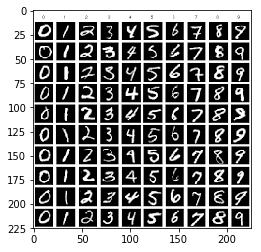

In [20]:
imgplot = plt.imshow(img)
plt.show()

Mostrar la primera imagen

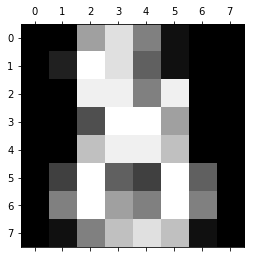

In [37]:
pl.matshow(digits.images[1796])

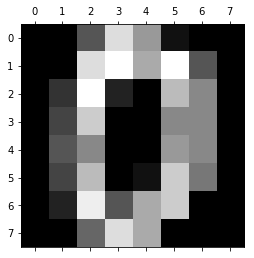

In [35]:
pl.matshow(digits.images[0])
pl.show()

Mostrar la matriz de grises correspondiente. Ver correspondencia entre valor e intensidad de blanco del punto

In [38]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Para hacernos una idea, podemos ver las imágenes de la clase "2":

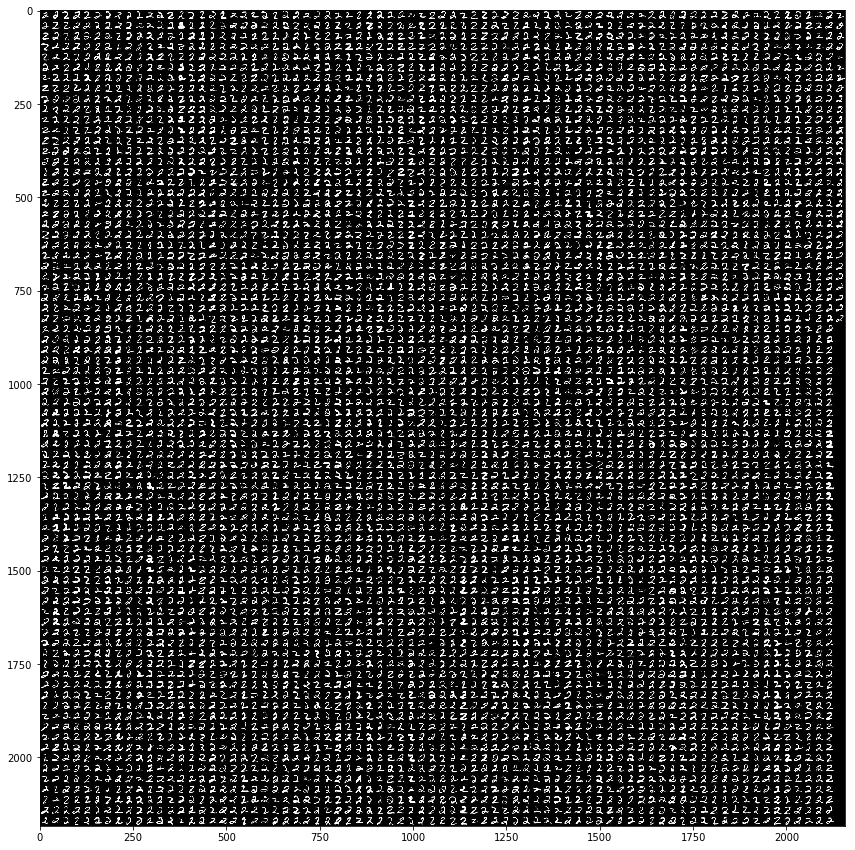

In [40]:
img=mpimg.imread('D:/Usuarios/94501228/OneDrive - ICESI/Cursos_Propios/IntroDS - Python/MNIST-Dataset-Number2.jpg')
plt.figure(figsize=(15, 15))
plt.imshow(img)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

In [53]:
n_samples = len(digits.images)
n_samples

1797

In [55]:
# En digits (que viene de load_digits()) se tiene un array con los labels de las clases reales, el valor a predecir.
# las 1797 clases reales quedan entonces en un array llamado "y"
y = digits.target
print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

Inicialmente se tienen 1797 imágenes de 8 filas por 8 columnas. Vamos a aplanarla para que cada imágen esté representada por los 8x8=64 valores de sus pixeles organizados en un solo array. Para tal motivo, es necesario eliminar una de las dimensiones

In [56]:
digits.images.shape

(1797, 8, 8)

In [58]:
# En la matriz "X" van a quedar los valores de los 64 pixeles de cada una de las 1797 imágenes
X = digits.images.reshape((n_samples, -1)) # se reducen las dimensiones
print(X.shape)
print(X)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [59]:
# Cada imagen tiene 64 features
len(X[0])

64

Se hace un particionamiento holdout. random_state sirve para inicializar la semilla pseudo aleatoria de tal forma que los resultados sean reproducibles.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [75]:
print("training: ", len(X_train))
print("test: ", len(X_test))

training:  1347
test:  450


Se aprende el modelo de NaïveBayes


In [62]:
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

Se verifica la calidad de la predicción con test set

In [69]:
y_pred = fit.predict(X_test)
print(y_test[0:30])
print(y_pred[0:30])
confusion_matrix(y_test, y_pred)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9]


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]], dtype=int64)

Vemos que en la diagonal están la mayoría de los casos, por lo que el modelo aprendido tiene cara de tener buenos resultados predictivos

In [73]:
fit.score(X_test, y_test)

0.8333333333333334

In [76]:
(37+39+20+39+31+43+51+47+38+30)/450

0.8333333333333334

Vamos a crear un iterador que tiene una dupla con las imagenes originales y los labels predichos.

Empezamos por crear una lista con esta información.

In [79]:
images_and_predictions = list(zip(digits.images, fit.predict(X)))
images_and_predictions

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), 1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0.,  0.,

Recorremos las 25 primeras imágenes para ver cómo nos fue

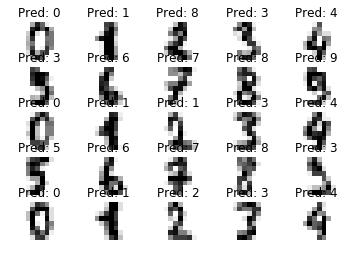

In [84]:
for index, (image, prediction) in enumerate(images_and_predictions[:25]):
    plt.subplot(5,5, index+1) #se crean los placeholders de 3x5 filasXcolumnas
    plt.axis('off')  #se quitan los ejes
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Pred: %i' % prediction)
plt.show()

In [86]:
print(y[0:24])
print(fit.predict(X)[0:24])

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3]
[0 1 8 3 4 3 6 7 8 9 0 1 1 3 4 5 6 7 8 3 0 1 2 3]
